## Análise Exploratória dos Dados dos Leitos Hospitalares de Goiás durante o Período da Pandemia de COVID-19

Considere a notícia abaixo:

"Governo de Goiás mantém leitos instalados no período crítico da pandemia"
https://www.saude.go.gov.br/noticias/16950-governo-de-goias-mantem-leitos-instalados-no-periodo-critico-da-pandemia

Sabendo que:
Os leitos são cadastrados no subsistema LT do sistema CNES (Cadastro Nacional de Estabelecimentos de Saúde);
Os dados do CNES.LT estão disponíveis publicamente no servidor FTP do DataSUS conforme exposto no endereço https://datasus.saude.gov.br/transferencia-de-arquivos/ ¹

Desenvolva uma análise exploratória que descreva a evolução da capacidade hospitalar (número de leitos) durante a pandemia 
de Covid-19 em Goiás. Você pode realizar a análise sobre qualquer perspectiva, mas abaixo listamos algumas sugestões:

-Compare a distribuição geográfica dos leitos por município antes e depois da pandemia; ou

-Analise a evolução do número de leitos no tempo; ou

-Verifique se em algum momento pôde ser observado um declínio na capacidade hospitalar instalada; ou

-Comparar a quantidade de leitos SUS e leitos não SUS no tempo e no espaço.

## --------------------------------------------------------------------------------------------

O primeiro caso confirmado de pessoa com o coronavírus no Brasil ocorreu em 26 de fevereiro de 2020. Desde então, já foram registrados mais de 36 milhões de casos no país.

Em 11 de março de 2020, a COVID-19 foi caracterizada pela OMS como uma pandemia.

Portanto, vou utilizar os dados dos leitos do CNES desde janeiro de 2020 até novembro de 2022 (dezembro ainda não está disponível).

In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

In [2]:
#lendo a base de dados obtida com o "microdatasus" do R!
df = pd.read_csv("CNES_SUS.csv", encoding="latin_1")
pd.set_option('display.max_columns', None)
display(df)

,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,CNPJ_MAN,ESFERA_A,ATIVIDAD,RETENCAO,NATUREZA,CLIENTEL,TP_UNID,TURNO_AT,NIV_HIER,TERCEIRO,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR
0,9331603,520010,NaN,NaN,NaN,NaN,M,3,0,3,1298330000178,NaN,4,NaN,NaN,3.0,15,6,NaN,NaN,2,33,9,0,9,0,202001,1244
1,2335506,520013,15,NaN,NaN,NaN,M,3,269860000125,1,0,NaN,4,NaN,NaN,3.0,5,6,NaN,NaN,4,43,3,0,3,0,202001,2062
2,2335506,520013,15,NaN,NaN,NaN,M,3,269860000125,1,0,NaN,4,NaN,NaN,3.0,5,6,NaN,NaN,1,3,2,0,1,1,202001,2062
3,2335506,520013,15,NaN,NaN,NaN,M,3,269860000125,1,0,NaN,4,NaN,NaN,3.0,5,6,NaN,NaN,2,41,2,0,2,0,202001,2062
4,2335506,520013,15,NaN,NaN,NaN,M,3,269860000125,1,0,NaN,4,NaN,NaN,3.0,5,6,NaN,NaN,6,34,4,0,3,1,202001,2062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103493,2383691,522205,001,NaN,NaN,NaN,M,3,0,3,44834000107,NaN,4,NaN,NaN,3.0,5,6,NaN,NaN,1,3,3,0,3,0,202211,1244
103494,2383691,522205,001,NaN,NaN,NaN,M,3,0,3,44834000107,NaN,4,NaN,NaN,3.0,5,6,NaN,NaN,4,10,3,0,3,0,202211,1244
103495,2439883,522220,02,NaN,NaN,NaN,M,3,0,3,37388378000114,NaN,4,NaN,NaN,3.0,5,6,NaN,NaN,2,33,7,0,7,0,202211,1244
103496,2439883,522220,02,NaN,NaN,NaN,M,3,0,3,37388378000114,NaN,4,NaN,NaN,3.0,5,6,NaN,NaN,4,43,2,0,2,0,202211,1244


#### Aqui já percebo algumas colunas que podem ser removidas (por estarem completamente vazias):

DISTRSAN - Código do distrito sanitário

ESFERA_A - Código da esfera administrativa

RETENCAO - Código de retenção de tributos

NATUREZA - Código da natureza da organização

NIV_HIER - Código do nível de hierarquia

TERCEIRO - O estabelecimento é terceiro: 1-Sim 0-Não .

#### Também vou verificar as oturas coluna que não vou utilizar nas análises.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103498 entries, 0 to 103497
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CNES      103498 non-null  int64  
 1   CODUFMUN  103498 non-null  int64  
 2   REGSAUDE  63062 non-null   object 
 3   MICR_REG  5428 non-null    object 
 4   DISTRSAN  0 non-null       float64
 5   DISTRADM  1110 non-null    object 
 6   TPGESTAO  103498 non-null  object 
 7   PF_PJ     103498 non-null  int64  
 8   CPF_CNPJ  103498 non-null  int64  
 9   NIV_DEP   103498 non-null  int64  
 10  CNPJ_MAN  103498 non-null  int64  
 11  ESFERA_A  0 non-null       float64
 12  ATIVIDAD  103498 non-null  int64  
 13  RETENCAO  0 non-null       float64
 14  NATUREZA  0 non-null       float64
 15  CLIENTEL  102951 non-null  float64
 16  TP_UNID   103498 non-null  int64  
 17  TURNO_AT  103498 non-null  int64  
 18  NIV_HIER  0 non-null       float64
 19  TERCEIRO  0 non-null       float64
 20  TP_L

In [4]:
df.describe()

,CNES,CODUFMUN,DISTRSAN,PF_PJ,CPF_CNPJ,NIV_DEP,CNPJ_MAN,ESFERA_A,ATIVIDAD,RETENCAO,NATUREZA,CLIENTEL,TP_UNID,TURNO_AT,NIV_HIER,TERCEIRO,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR
count,1.034980e+05,103498.000000,0.0,103498.0,1.034980e+05,103498.000000,1.034980e+05,0.0,103498.000000,0.0,0.0,102951.000000,103498.000000,103498.000000,0.0,0.0,103498.000000,103498.000000,103498.000000,103498.0,103498.000000,103498.000000,103498.000000,103498.000000
mean,3.257750e+06,521015.281938,NaN,3.0,5.341211e+12,1.814315,2.265187e+12,NaN,3.946250,NaN,NaN,2.606259,7.058871,5.664361,NaN,NaN,2.669771,31.241454,7.275252,0.0,4.372336,2.902916,202104.822934,1900.818190
std,2.030480e+06,556.824212,NaN,0.0,1.116196e+13,0.982614,6.770951e+12,NaN,0.319545,NaN,NaN,0.772546,9.581532,0.854806,NaN,NaN,1.623979,23.737058,15.028129,0.0,11.496511,8.553615,80.700848,797.306038
min,2.407400e+04,520010.000000,NaN,3.0,0.000000e+00,1.000000,0.000000e+00,NaN,1.000000,NaN,NaN,1.000000,5.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,202001.000000,1015.000000
25%,2.361396e+06,520780.000000,NaN,3.0,0.000000e+00,1.000000,0.000000e+00,NaN,4.000000,NaN,NaN,3.000000,5.000000,6.000000,NaN,NaN,1.000000,10.000000,2.000000,0.0,0.000000,0.000000,202010.000000,1244.000000
50%,2.500132e+06,520870.000000,NaN,3.0,1.323146e+12,1.000000,0.000000e+00,NaN,4.000000,NaN,NaN,3.000000,5.000000,6.000000,NaN,NaN,2.000000,33.000000,4.000000,0.0,1.000000,1.000000,202106.000000,2062.000000
75%,2.589230e+06,521310.000000,NaN,3.0,2.608131e+12,3.000000,1.740448e+12,NaN,4.000000,NaN,NaN,3.000000,5.000000,6.000000,NaN,NaN,4.000000,45.000000,8.000000,0.0,4.000000,3.000000,202203.000000,2062.000000
max,9.953086e+06,522220.000000,NaN,3.0,8.684038e+13,3.000000,6.097574e+13,NaN,5.000000,NaN,NaN,3.000000,77.000000,6.000000,NaN,NaN,7.000000,96.000000,343.000000,0.0,275.000000,203.000000,202211.000000,3999.000000


In [5]:
df["CNES"].value_counts()

2339218    1365
2338424    1232
2518406    1156
9744665    1155
2518155    1100
           ... 
2987171       4
3958183       2
3994422       2
7529368       1
251682        1
Name: CNES, Length: 546, dtype: int64

In [6]:
df["CODUFMUN"].value_counts()

520870    32972
520110     3874
520540     3148
520140     2785
521880     2728
          ...  
520180       35
520010       35
520310       33
521390       30
521523       30
Name: CODUFMUN, Length: 194, dtype: int64

In [7]:
df["REGSAUDE"].describe()

count     63062
unique       48
top           1
freq       7810
Name: REGSAUDE, dtype: object

In [8]:
df["MICR_REG"].describe()

count     5428
unique       8
top        SUL
freq      2544
Name: MICR_REG, dtype: object

In [9]:
df["PF_PJ"].describe()

count    103498.0
mean          3.0
std           0.0
min           3.0
25%           3.0
50%           3.0
75%           3.0
max           3.0
Name: PF_PJ, dtype: float64

Aqui percebo que nesta coluna PF_PJ só existem registros como 3 (que seriam pessoas jurídicas). Ou seja, todos os 103498 registros da tabela são registrados como pessoa jurídica (que seria o estabelecimento). Então posso remover a coluna também.

In [10]:
df["PF_PJ"].value_counts()

3    103498
Name: PF_PJ, dtype: int64

In [11]:
df["CPF_CNPJ"].value_counts()

0                 40800
1625151000106      1365
1567601000224      1232
17239624000169     1155
33620899000102     1100
                  ...  
1613433003605         6
2274652000140         5
20630241000121        5
38710074000194        4
10846245000198        2
Name: CPF_CNPJ, Length: 296, dtype: int64

In [12]:
df["NIV_DEP"].value_counts()

1    61358
3    42140
Name: NIV_DEP, dtype: int64

In [13]:
df["CNPJ_MAN"].value_counts()

0                 61358
2529964000157      5892
1567601000143      1324
25141524000123      996
2056778000148       574
                  ...  
1629276000104        30
2267698000131        30
2321917000113        25
1219807000182        23
1825413000178         9
Name: CNPJ_MAN, Length: 192, dtype: int64

In [14]:
df["ATIVIDAD"].value_counts()

4    93787
3     7243
5     2236
2      140
1       92
Name: ATIVIDAD, dtype: int64

In [15]:
df["CLIENTEL"].value_counts()

3.0    80849
1.0    18434
2.0     3668
Name: CLIENTEL, dtype: int64

In [16]:
df["TP_UNID"].value_counts()

5     87713
7     10743
62     1513
15     1330
36      813
20      451
73      445
70      218
69      203
21       41
77       28
Name: TP_UNID, dtype: int64

In [17]:
df["TURNO_AT"].value_counts()

6    88688
4     7238
3     6345
5     1227
Name: TURNO_AT, dtype: int64

In [18]:
df["TP_LEITO"].value_counts()

1    33521
2    24811
4    16503
3    11856
5    11161
6     3734
7     1912
Name: TP_LEITO, dtype: int64

In [19]:
df["CODLEITO"].value_counts()

33    13600
3     10862
45     9832
10     8423
43     8080
      ...  
65       58
52       54
88       43
89       13
86        7
Name: CODLEITO, Length: 67, dtype: int64

In [20]:
df["QT_EXIST"].value_counts()

2      20694
1      20467
4      10972
3      10251
5       7097
       ...  
44         2
61         1
161        1
121        1
343        1
Name: QT_EXIST, Length: 100, dtype: int64

In [21]:
df["QT_EXIST"].sum()

752974

Aqui percebi que nesta coluna nenhum dos registros conta com nenhum leito contratado. Posso deletar a coluna também.

In [22]:
df["QT_CONTR"].value_counts()

0    103498
Name: QT_CONTR, dtype: int64

In [23]:
df["QT_SUS"].value_counts()

0      40539
1      12858
2      11919
4       7225
3       6287
       ...  
68         3
80         3
275        1
69         1
71         1
Name: QT_SUS, Length: 90, dtype: int64

In [24]:
df["QT_SUS"].sum()

452528

In [25]:
df["QT_NSUS"].value_counts()

0     46303
1     17017
2     12767
3      5609
4      5143
      ...  
31        2
90        1
65        1
86        1
51        1
Name: QT_NSUS, Length: 71, dtype: int64

In [26]:
df["QT_NSUS"].sum()

300446

COMPETEN é a data (no formato AAAAMM - ano e mês) da informação.

In [27]:
df["COMPETEN"].value_counts()

202203    3069
202202    3068
202201    3067
202205    3056
202204    3056
202112    3046
202108    3041
202111    3036
202110    3032
202109    3026
202107    3001
202106    2984
202105    2965
202209    2964
202208    2962
202207    2960
202210    2960
202104    2956
202206    2952
202211    2944
202012    2934
202010    2924
202009    2924
202103    2922
202011    2921
202008    2918
202101    2895
202102    2889
202007    2885
202006    2870
202004    2868
202005    2862
202003    2856
202002    2844
202001    2841
Name: COMPETEN, dtype: int64

In [28]:
df["NAT_JUR"].value_counts()

2062    43697
1244    32495
3999     9399
1023     5892
1031     2321
2054     1923
2305     1909
2135     1404
1104     1324
3069     1008
2143      992
2089      469
2240      279
1015      245
2232      141
Name: NAT_JUR, dtype: int64

#### Então, vou retirar também as colunas CPF_CNPJ, NIV_DEP, CNPJ_MAN, ATIVIDAD, TP_UNID, TURNO_AT, QT_CONTR e NAT_JUR pois não vou utilizá-las em minhas análises.

Dropando todas as colunas que não preciso.

In [29]:
df2 = df.drop(['DISTRSAN', 'ESFERA_A', 'RETENCAO', 'NATUREZA', 'NIV_HIER', 'TERCEIRO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ATIVIDAD', 'TP_UNID', 'TURNO_AT', 'QT_CONTR', 'NAT_JUR'], axis=1)
display(df2)


listatemp = df["COMPETEN"].unique()
print(type(listatemp))

,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRADM,TPGESTAO,CLIENTEL,TP_LEITO,CODLEITO,QT_EXIST,QT_SUS,QT_NSUS,COMPETEN
0,9331603,520010,NaN,NaN,NaN,M,3.0,2,33,9,9,0,202001
1,2335506,520013,15,NaN,NaN,M,3.0,4,43,3,3,0,202001
2,2335506,520013,15,NaN,NaN,M,3.0,1,3,2,1,1,202001
3,2335506,520013,15,NaN,NaN,M,3.0,2,41,2,2,0,202001
4,2335506,520013,15,NaN,NaN,M,3.0,6,34,4,3,1,202001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103493,2383691,522205,001,NaN,NaN,M,3.0,1,3,3,3,0,202211
103494,2383691,522205,001,NaN,NaN,M,3.0,4,10,3,3,0,202211
103495,2439883,522220,02,NaN,NaN,M,3.0,2,33,7,7,0,202211
103496,2439883,522220,02,NaN,NaN,M,3.0,4,43,2,2,0,202211


<class 'numpy.ndarray'>


In [30]:
#criando uma lista para manipular as datas, como pode ser observado adiante.
listatemp = pd.to_datetime(listatemp, format="%Y%m")
print(listatemp)

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01'],
              dtype='datetime64[ns]', freq=None)


#### Então agora posso começar a analisar os dados, direcionado a algumas questões:

-Analise a evolução do número de leitos no tempo; verifique se em algum momento pôde ser observado um declínio na capacidade hospitalar instalada;
    
-Compare a distribuição geográfica dos leitos por município antes e depois da pandemia:

In [31]:
df7 = df2[["COMPETEN", "QT_EXIST"]] #novo dataframe somente com as informações que preciso no momento.

df8 = df7.groupby("COMPETEN")["QT_EXIST"].sum() #novo DF - groupby year month, soma dos leitos.

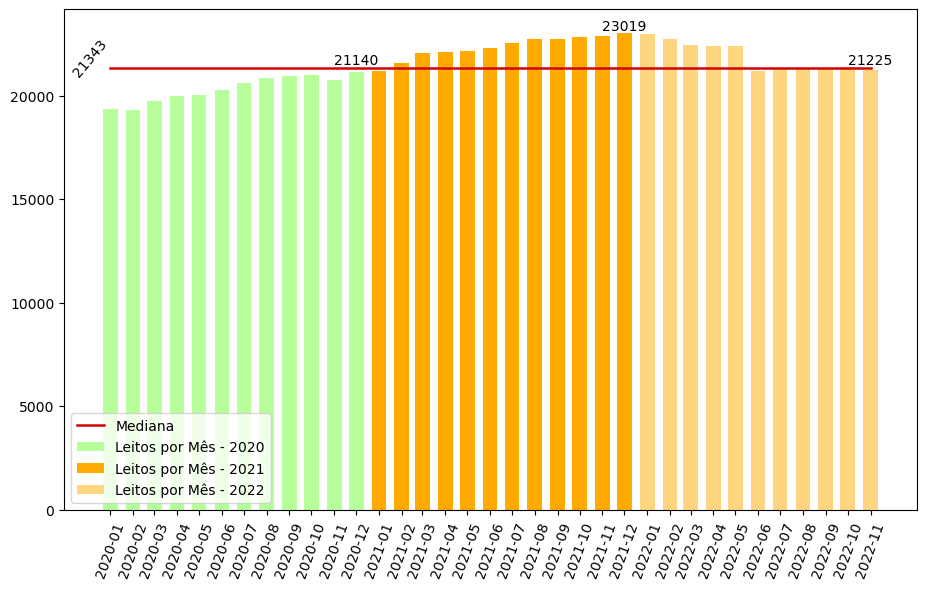

In [41]:
leitosmes_median = df8.median() #mediana
df17 = [[leitosmes_median] * len(df8)] #novo DF para plotar a mediana no gráfico.

#Plotting
fig, ax = plt.subplots(figsize=(11,6.5))

ax.bar(listatemp[0:12], df8.values[0:12], color='#B7FF9B', label="Leitos por Mês - 2020", width = 20)
ax.bar(listatemp[12:24], df8.values[12:24], color='#FFAA00', label="Leitos por Mês - 2021", width = 20)
ax.bar(listatemp[24:35], df8.values[24:35], color='#FFD580', label="Leitos por Mês - 2022", width = 20)
ax.plot(listatemp, df17[0], linewidth=1.8, label="Mediana", color='#D30202') #median over the plot

ax.annotate(int(df8.values[11]), (listatemp[11], df8.values[11]+350), ha = "center")
ax.annotate(int(df8.values[23]), (listatemp[23], df8.values[23]+150), ha = "center")
ax.annotate(int(df8.values[34]), (listatemp[34], df8.values[34]+300), ha = "center")
ax.annotate(int(leitosmes_median), (listatemp[0], leitosmes_median -400), ha="right", rotation=50) #median value in plot

plt.xticks(listatemp)
# Rotating legends
ax.tick_params('x',labelrotation=70)

ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m'))

# Adding legend
ax.legend();

#### Como podemos observar no gráfico acima:
- A partir do final de fevereiro de 2020, período que podemos chamar do início da pandemia de COVID-19 no Brasil, o número de leitos cresceu mês após mês (salvo algumas exceções, como em novembro de 2021), até o mês de dezembro de 2021.

- Podemos dizer que o pico da pandemia no Brasil aconteceu em Março de 2021, com aproximadamente 79 mil mortes causadas pela doença naquele mês. Este número veio diminuindo com o passar dos meses, após o pico.

- Podemos pensar que houve um atraso ou que não houve um planejamento precoce visando se preparar para meses em que o surto da pandemia seria maior, como em Março de 2021, visto que mesmo sendo o mês de pico no número de mortes, não é o mês em que haviam mais leitos disponíveis (pelo menos em Goiás). Também, esta menor disponibilidade de leitos naquele momento pode ter contribuído para os péssimos índices do mês.

- De qualquer forma, quando comparado com o período pré pandêmico, o estado mantém até hoje boa parte dos leitos que foram criados.

In [33]:
#Preparando os dados para analisar a distribuição dos leitos pelos municípios do estado.
df4 = df2[["COMPETEN", "CODUFMUN", "QT_EXIST"]]

df5 = df4[df4["COMPETEN"] == 202001] #janeiro 2020
df6 = df5[["CODUFMUN", "QT_EXIST"]]
df6["CODUFMUN"] = df6["CODUFMUN"].astype(str)

df6 = df6.groupby("CODUFMUN").sum().sort_values(by=["QT_EXIST"], ascending=False).head(10)

pd.set_option('display.max_rows', None)
display(df6)

C:\Users\leonardo\AppData\Local\Temp\ipykernel_13920\1782430685.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6["CODUFMUN"] = df6["CODUFMUN"].astype(str)


,QT_EXIST
CODUFMUN,
520870,7593
520140,1197
520110,1151
522140,510
521880,485
520540,352
520510,336
521150,271
520860,271


In [34]:
#np.vectorize() - para poder plotar os gráficos
vetor2 = df6.values.squeeze()
print(vetor2)

[7593 1197 1151  510  485  352  336  271  271  259]


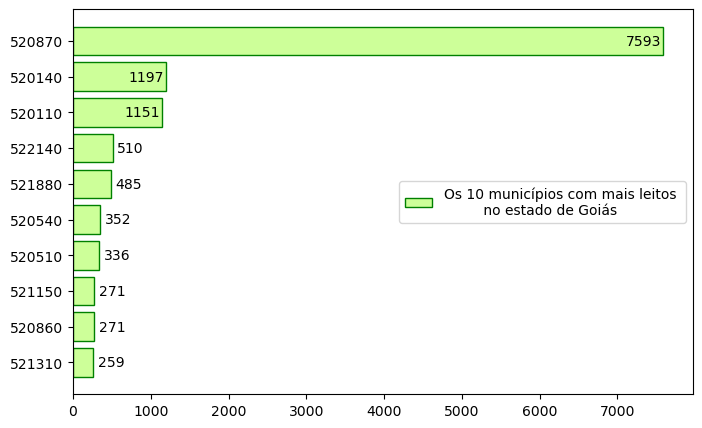

In [45]:
fig, ax = plt.subplots(figsize=(8,5))

ax.barh(df6.index, vetor2, color='#CDFF99', edgecolor = "g", label="Os 10 municípios com mais leitos \n         no estado de Goiás")
ax.invert_yaxis()
for i in range(len(df6)):
    if df6.values[i] > 1100:
        ax.annotate(vetor2[i], (df6.values[i]-260, df6.index[i]), ha="center", verticalalignment='center')
    else:
        ax.annotate(vetor2[i], (df6.values[i]+230, df6.index[i]), ha="center", verticalalignment='center')
ax.legend(loc=7);

In [51]:
df7 = df4[df4["COMPETEN"] == 202211] #novembro 2022
df9 = df7[["CODUFMUN", "QT_EXIST"]]
df9["CODUFMUN"] = df9["CODUFMUN"].astype(str)
df9 = df9.groupby("CODUFMUN").sum().sort_values(by=["QT_EXIST"], ascending=False).head(10)

display(df9)

C:\Users\leonardo\AppData\Local\Temp\ipykernel_13920\3730917828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9["CODUFMUN"] = df9["CODUFMUN"].astype(str)


,QT_EXIST
CODUFMUN,
520870,8275
520140,1402
520110,1263
521880,637
522140,562
522160,499
520540,345
521150,326
520510,319


In [37]:
#np.vectorize()
vetor1 = df9.values.squeeze()
print(vetor1)

[8275 1402 1263  637  562  499  345  326  319  271]


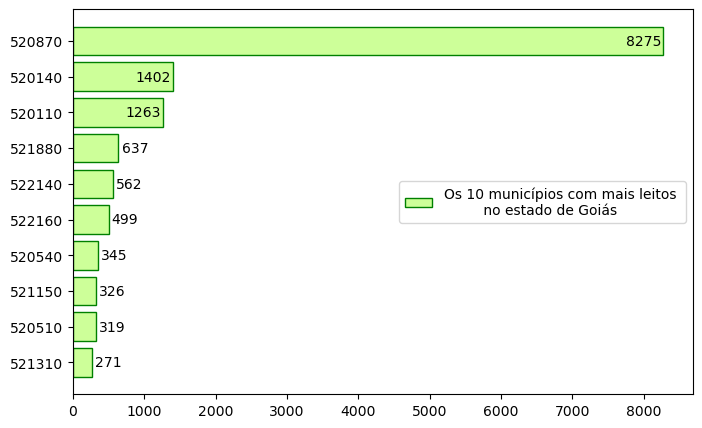

In [47]:
fig, ax = plt.subplots(figsize=(8,5))

ax.barh(df9.index, vetor1, color='#CDFF99', edgecolor = "g", label="Os 10 municípios com mais leitos \n         no estado de Goiás")
ax.invert_yaxis()
for i in range(len(df9)):
    if df9.values[i] > 1200:
        ax.annotate(vetor1[i], (df9.values[i]-280, df9.index[i]), ha="center", verticalalignment='center')
    else:
        ax.annotate(vetor1[i], (df9.values[i]+230, df9.index[i]), ha="center", verticalalignment='center')
ax.legend(loc=7);

#### Como podemos observar nos gráficos acima:
- Como podemos observar, os 5 municípios com mais leitos no estado se mantiveram praticamente nas mesmas posições, quando comparamos os leitos disponíveis antes da pandemia e em Novembro de 2022 (após uma certa normalização do cenário pandêmico).

- São eles: 

#### 520870 - GOIANIA (como esperado, a capital se manteve em primeiro lugar em ambos os períodos analisados);

#### 520140 - APARECIDA DE GOIANIA;

#### 520110 - ANAPOLIS;

#### 521880 - RIO VERDE (possuía menos leitos disponíveis do que Trindade, antes da pandemia, cenário que se alterou hoje em dia);

#### 522140 - e TRINDADE.

- Também vale destacar o município de GOIANESIA (código 520860), que estava entre os 10 municípios do estado com mais leitos disponíveis antes da pandemia, e que atualmente não consta mais nesta lista.

#### Fontes: 
JHU CSSE COVID-19 Data - https://github.com/CSSEGISandData/COVID-19 ;

Histórico da pandemia de COVID-19 - OPAS/OMS - https://www.paho.org/pt/covid19/historico-da-pandemia-covid-19#:~:text=Em%2011%20de%20mar%C3%A7o%20de,pela%20OMS%20como%20uma%20pandemia ;

Dois anos do primeiro caso de coronavírus no Brasil - https://www12.senado.leg.br/radio/1/noticia/2022/02/23/dois-anos-do-primeiro-caso-de-coronavirus-no-brasil ;

Estabelecimentos Cadastrados nos Municípios do Estado de GOIAS - http://cnes2.datasus.gov.br/Lista_Tot_Es_Municipio.asp?Estado=52&NomeEstado=GOIAS ;

Pico da pandemia em 2021 teve mais que o dobro de mortes que a alta em 2020 - https://www.poder360.com.br/coronavirus/pico-da-pandemia-em-2021-teve-mais-que-o-dobro-de-mortes-que-a-alta-em-2020/ .